# Working Data

## Taller 1: John Luis González Padilla

In [1]:
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_gbq
import matplotlib.pyplot as plt

# Definir la ruta de los directorios 
from pathlib import Path
current_dir = Path(".").resolve()
project_dir = Path(current_dir).parent

In [2]:
query = """
SELECT
   *
FROM 
    `bigquery-public-data.chicago_taxi_trips.taxi_trips` 
  
LIMIT
    1000
"""
df = pd.read_gbq(query)
df.head()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,1635cc78e071c55379ba87d3d275a4f21333d213,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 11:30:00+00:00,2016-09-22 11:45:00+00:00,600,0.8,<NA>,<NA>,<NA>,<NA>,...,0.0,9.25,Credit Card,Chicago Independents,NaN,NaN,None,NaN,NaN,None
1,1e3168900f8090e1bab555b15210f6ad701af327,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 11:45:00+00:00,2016-09-22 12:00:00+00:00,960,7.6,<NA>,<NA>,<NA>,<NA>,...,0.0,21.50,Cash,Chicago Independents,NaN,NaN,None,NaN,NaN,None
2,c620405438b7bfcc6378f885f6aa56d1b8be9369,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 15:00:00+00:00,2016-09-22 15:45:00+00:00,3000,13.2,<NA>,<NA>,<NA>,<NA>,...,0.0,37.00,Cash,Chicago Independents,NaN,NaN,None,NaN,NaN,None
3,c8b56b9c599580efc1e4ffe36ac36cfb7ea85cbd,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 17:15:00+00:00,2016-09-22 17:45:00+00:00,2220,12.2,<NA>,<NA>,<NA>,<NA>,...,4.5,46.58,Credit Card,Chicago Independents,NaN,NaN,None,NaN,NaN,None
4,c876619a0a2869039533144d7105948e9cfc1951,1158f25979ad78fd3dafc867a540ad761b65922c312e61...,2016-09-19 21:00:00+00:00,2016-09-19 21:30:00+00:00,1560,15.6,<NA>,<NA>,<NA>,<NA>,...,4.0,52.40,Credit Card,Sun Taxi,NaN,NaN,None,NaN,NaN,None


# Explore your data

In [3]:
# Get only numeric colums
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]

num_df = df.select_dtypes(include=numerics)
num_df.head()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,600,0.8,<NA>,<NA>,<NA>,<NA>,6.75,2.00,0.0,0.0,9.25,NaN,NaN,NaN,NaN
1,960,7.6,<NA>,<NA>,<NA>,<NA>,21.50,0.00,0.0,0.0,21.50,NaN,NaN,NaN,NaN
2,3000,13.2,<NA>,<NA>,<NA>,<NA>,37.00,0.00,0.0,0.0,37.00,NaN,NaN,NaN,NaN
3,2220,12.2,<NA>,<NA>,<NA>,<NA>,35.50,6.08,0.0,4.5,46.58,NaN,NaN,NaN,NaN
4,1560,15.6,<NA>,<NA>,<NA>,<NA>,39.25,8.65,0.0,4.0,52.40,NaN,NaN,NaN,NaN


In [4]:
num_df.describe()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,1000.000000,1000.000000,0,0,0,0,1000.000000,1000.000000,907.0,1000.000000,1000.000000,0.0,0.0,0.0,0.0
mean,827.440000,6.726440,<NA>,<NA>,<NA>,<NA>,13.628910,1.578080,0.0,0.970000,16.376990,NaN,NaN,NaN,NaN
std,803.937998,18.950691,<NA>,<NA>,<NA>,<NA>,13.689976,2.675334,0.0,3.560024,16.965577,NaN,NaN,NaN,NaN
min,0.000000,0.000000,<NA>,<NA>,<NA>,<NA>,0.010000,0.000000,0.0,0.000000,0.010000,NaN,NaN,NaN,NaN
25%,347.500000,1.000000,<NA>,<NA>,<NA>,<NA>,6.000000,0.000000,0.0,0.000000,7.250000,NaN,NaN,NaN,NaN
50%,600.000000,1.900000,<NA>,<NA>,<NA>,<NA>,8.500000,0.000000,0.0,0.000000,10.250000,NaN,NaN,NaN,NaN
75%,960.000000,5.725000,<NA>,<NA>,<NA>,<NA>,14.762500,2.000000,0.0,1.000000,17.500000,NaN,NaN,NaN,NaN
max,6240.000000,195.900000,<NA>,<NA>,<NA>,<NA>,145.000000,20.000000,0.0,72.000000,217.000000,NaN,NaN,NaN,NaN


# One-dimensional data

<AxesSubplot:>

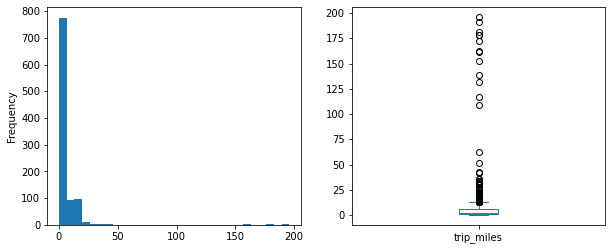

In [5]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
num_df["trip_miles"].plot(kind="hist", bins=30, ax=ax[0])
num_df["trip_miles"].plot(kind="box",           ax=ax[1])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


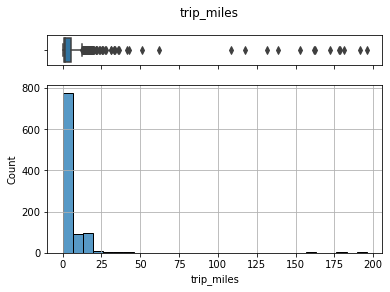

In [6]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["trip_miles"], ax=ax_box)
sns.histplot(data=num_df, x="trip_miles", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('trip_miles')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'trip_miles')
#f.savefig(plot_path)

# Log-Transform

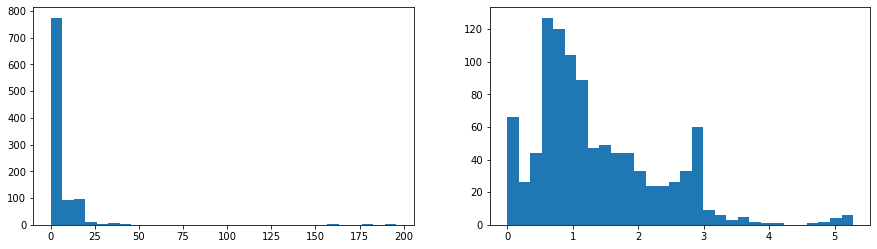

In [7]:
x     = num_df["trip_miles"]
log_x = np.log(x+1)

f, ax = plt.subplots(1,2, figsize=(15, 4))

ax[0].hist(x,     bins=30)
ax[1].hist(log_x, bins=30);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trip_miles'>

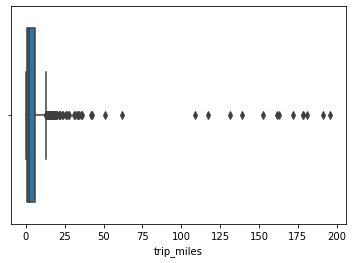

In [8]:
sns.boxplot(x)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trip_miles'>

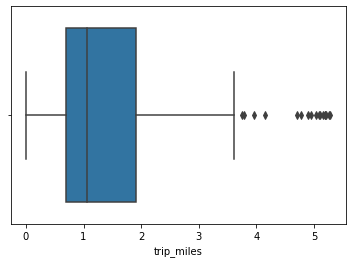

In [9]:
sns.boxplot(log_x)

In [10]:
2.78**(log_x.mean())

4.013226516151047

In [11]:
np.exp(log_x.mean())

3.892621601382286

# Two dimensions

(0.0, 10.0)

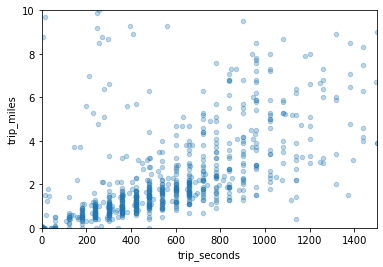

In [12]:
num_df.plot(kind="scatter", x="trip_seconds", y="trip_miles", alpha=0.3)
plt.xlim(0, 1500)
plt.ylim(0, 10)

In [13]:
x="trip_seconds"
y="trip_miles"
num_df[[x, y]].corr()

,trip_seconds,trip_miles
trip_seconds,1.000000,0.388041
trip_miles,0.388041,1.000000


<AxesSubplot:xlabel='trip_seconds', ylabel='trip_miles'>

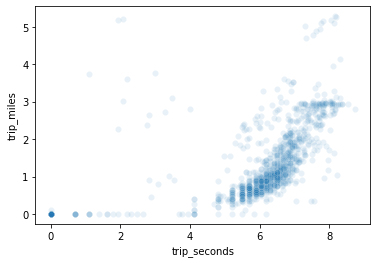

In [14]:
log_x = np.log(num_df[x] + 1)
log_y = np.log(num_df[y] + 1)
sns.scatterplot(x=log_x, y=log_y, alpha=0.1)

In [15]:
log_num_df = pd.DataFrame(
    columns=[x, y]
)

log_num_df[x] = log_x
log_num_df[y] = log_y

log_num_df.corr()

,trip_seconds,trip_miles
trip_seconds,1.000000,0.543457
trip_miles,0.543457,1.000000


# Many Dimensions

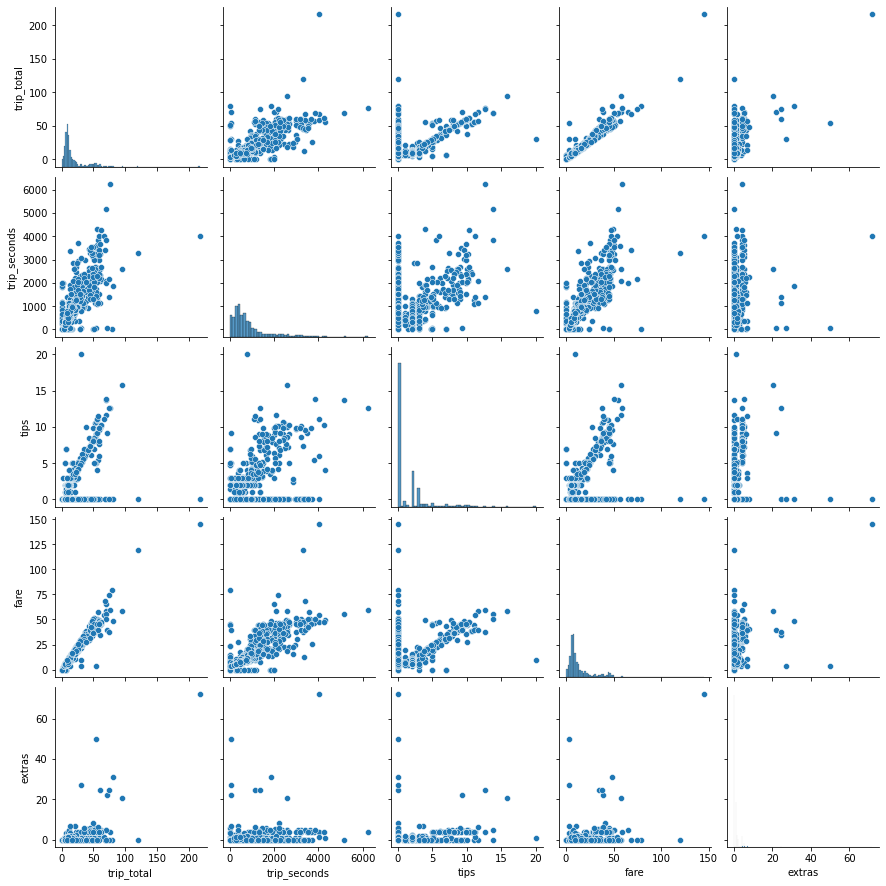

In [16]:
cols = ["trip_total", "trip_seconds", "tips", "fare", "extras"]
sns.pairplot(data=num_df[cols])

<AxesSubplot:>

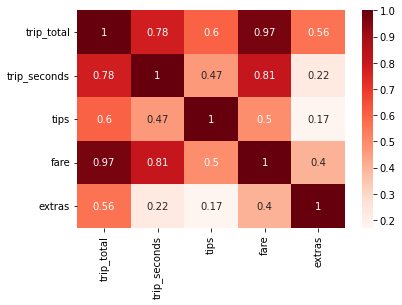

In [17]:
correlations = num_df[cols].corr()
sns.heatmap(correlations, cmap="Reds", annot=True)

# Manipulating Data

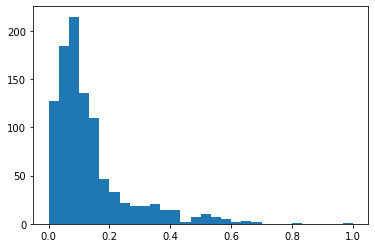

In [18]:
x = num_df["trip_seconds"]
x_min = x.min()
x_max = x.max()

x_scaled = (x - x_min) / (x_max - x_min)

plt.hist(x_scaled, bins=30);

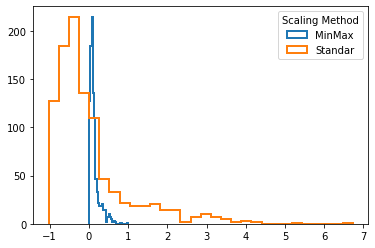

In [19]:
x = num_df["trip_seconds"]
x_min = x.min()
x_max = x.max()

x_mean = x.mean()
x_std  = x.std()

x_minmax_scaled = (x -x_min) / (x_max - x_min) # MinMax Scaler
x_std_scaled     = (x-x_mean)/x_std            # Standar scaler

plt.hist(x_scaled,     bins=30, label="MinMax",  histtype = "step", lw=2)
plt.hist(x_std_scaled, bins=30, label="Standar", histtype = "step", lw=2)

plt.legend(title = "Scaling Method");

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [21]:
minmax_scaler = MinMaxScaler().fit(num_df[cols])
data_min_max_scaled = minmax_scaler.transform(num_df[cols])

In [22]:
num_df_minmax_scaled = pd.DataFrame(columns = num_df[cols].columns, data = data_min_max_scaled)
num_df_minmax_scaled.head()

,trip_total,trip_seconds,tips,fare,extras
0,0.042583,0.096154,0.1000,0.046486,0.000000
1,0.099037,0.153846,0.0000,0.148217,0.000000
2,0.170469,0.480769,0.0000,0.255121,0.000000
3,0.214618,0.355769,0.3040,0.244776,0.062500
4,0.241440,0.250000,0.4325,0.270639,0.055556


# Fare
_____________________

## Explore your data

In [23]:
# Get only numeric colums
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]

num_fare = df.select_dtypes(include=numerics)
num_fare.head()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,600,0.8,<NA>,<NA>,<NA>,<NA>,6.75,2.00,0.0,0.0,9.25,NaN,NaN,NaN,NaN
1,960,7.6,<NA>,<NA>,<NA>,<NA>,21.50,0.00,0.0,0.0,21.50,NaN,NaN,NaN,NaN
2,3000,13.2,<NA>,<NA>,<NA>,<NA>,37.00,0.00,0.0,0.0,37.00,NaN,NaN,NaN,NaN
3,2220,12.2,<NA>,<NA>,<NA>,<NA>,35.50,6.08,0.0,4.5,46.58,NaN,NaN,NaN,NaN
4,1560,15.6,<NA>,<NA>,<NA>,<NA>,39.25,8.65,0.0,4.0,52.40,NaN,NaN,NaN,NaN


## One-dimensional data

<AxesSubplot:>

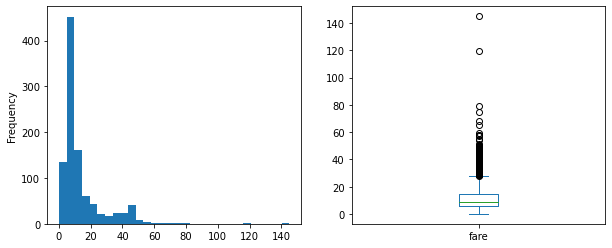

In [24]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
num_fare["fare"].plot(kind="hist", bins=30, ax=ax[0])
num_fare["fare"].plot(kind="box",           ax=ax[1])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


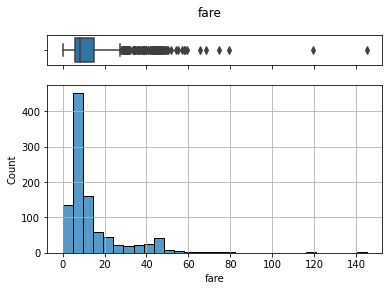

In [25]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_fare["fare"], ax=ax_box)
sns.histplot(data=num_fare, x="fare", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('fare')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'fare')
#f.savefig(plot_path)

## Log-Transform

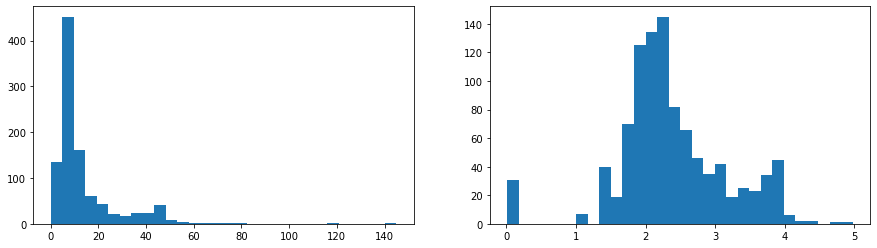

In [26]:
x     = num_fare["fare"]
log_x = np.log(x+1)

f, ax = plt.subplots(1,2, figsize=(15, 4))

ax[0].hist(x,     bins=30)
ax[1].hist(log_x, bins=30);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fare'>

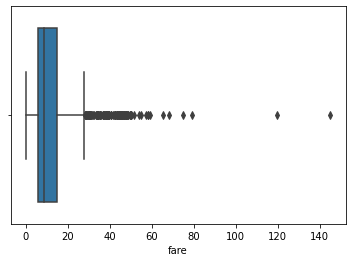

In [27]:
sns.boxplot(x)

## Two dimensions

(0.0, 10.0)

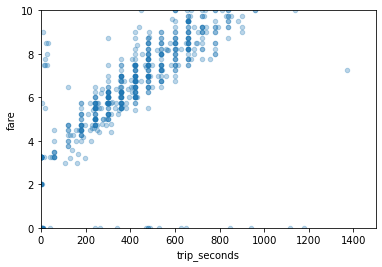

In [28]:
num_fare.plot(kind="scatter", x="trip_seconds", y="fare", alpha=0.3)
plt.xlim(0, 1500)
plt.ylim(0, 10)

In [29]:
x="trip_seconds"
y="fare"
num_df[[x, y]].corr()

,trip_seconds,fare
trip_seconds,1.000000,0.811545
fare,0.811545,1.000000


<AxesSubplot:xlabel='trip_seconds', ylabel='fare'>

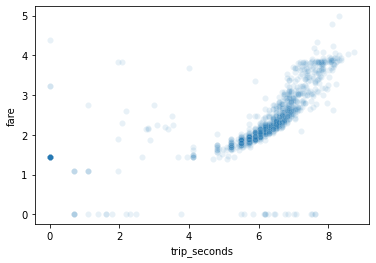

In [30]:
log_x = np.log(num_fare[x] + 1)
log_y = np.log(num_fare[y] + 1)
sns.scatterplot(x=log_x, y=log_y, alpha=0.1)

In [31]:
log_num_fare = pd.DataFrame(
    columns=[x, y]
)

log_num_fare[x] = log_x
log_num_fare[y] = log_y

log_num_fare.corr()

,trip_seconds,fare
trip_seconds,1.000000,0.603068
fare,0.603068,1.000000


# Tips

## Explore your data

In [32]:
# Get only numeric colums
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]

num_tips = df.select_dtypes(include=numerics)
num_tips.head()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,600,0.8,<NA>,<NA>,<NA>,<NA>,6.75,2.00,0.0,0.0,9.25,NaN,NaN,NaN,NaN
1,960,7.6,<NA>,<NA>,<NA>,<NA>,21.50,0.00,0.0,0.0,21.50,NaN,NaN,NaN,NaN
2,3000,13.2,<NA>,<NA>,<NA>,<NA>,37.00,0.00,0.0,0.0,37.00,NaN,NaN,NaN,NaN
3,2220,12.2,<NA>,<NA>,<NA>,<NA>,35.50,6.08,0.0,4.5,46.58,NaN,NaN,NaN,NaN
4,1560,15.6,<NA>,<NA>,<NA>,<NA>,39.25,8.65,0.0,4.0,52.40,NaN,NaN,NaN,NaN


## One-dimensional data

<AxesSubplot:>

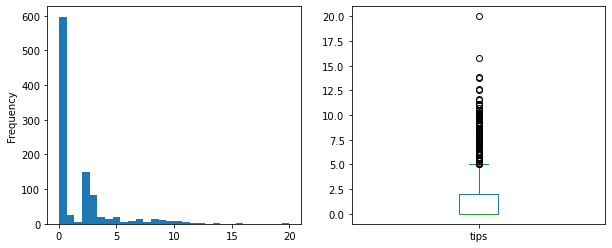

In [33]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
num_tips["tips"].plot(kind="hist", bins=30, ax=ax[0])
num_tips["tips"].plot(kind="box",           ax=ax[1])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


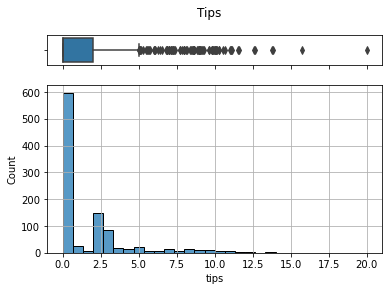

In [34]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_tips["tips"], ax=ax_box)
sns.histplot(data=num_tips, x="tips", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('Tips')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'tips')
#f.savefig(plot_path)

## Log-Transform

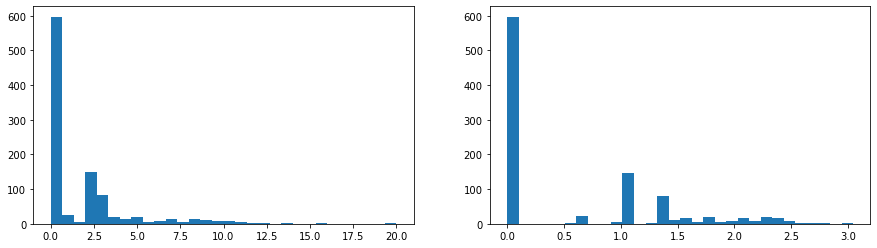

In [35]:
x     = num_tips["tips"]
log_x = np.log(x+1)

f, ax = plt.subplots(1,2, figsize=(15, 4))

ax[0].hist(x,     bins=30)
ax[1].hist(log_x, bins=30);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='tips'>

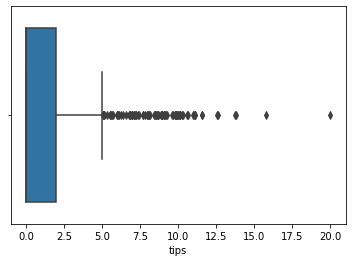

In [36]:
sns.boxplot(x)

## Two dimensions

(0.0, 10.0)

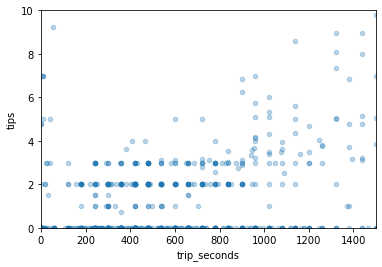

In [37]:
num_tips.plot(kind="scatter", x="trip_seconds", y="tips", alpha=0.3)
plt.xlim(0, 1500)
plt.ylim(0, 10)

In [38]:
x="trip_seconds"
y="tips"
num_tips[[x, y]].corr()

,trip_seconds,tips
trip_seconds,1.000000,0.465293
tips,0.465293,1.000000


<AxesSubplot:xlabel='trip_seconds', ylabel='tips'>

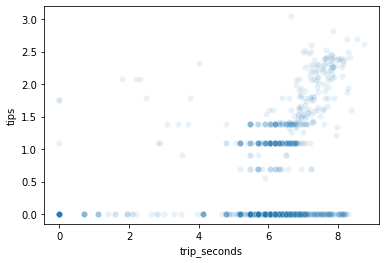

In [39]:
log_x = np.log(num_tips[x] + 1)
log_y = np.log(num_tips[y] + 1)
sns.scatterplot(x=log_x, y=log_y, alpha=0.1)

In [40]:
log_num_tips = pd.DataFrame(
    columns=[x, y]
)

log_num_tips[x] = log_x
log_num_tips[y] = log_y

log_num_tips.corr()

,trip_seconds,tips
trip_seconds,1.000000,0.259486
tips,0.259486,1.000000


# Tools

In [41]:
# Get only numeric colums
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]

num_tolls = df.select_dtypes(include=numerics)
num_tolls.head()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,600,0.8,<NA>,<NA>,<NA>,<NA>,6.75,2.00,0.0,0.0,9.25,NaN,NaN,NaN,NaN
1,960,7.6,<NA>,<NA>,<NA>,<NA>,21.50,0.00,0.0,0.0,21.50,NaN,NaN,NaN,NaN
2,3000,13.2,<NA>,<NA>,<NA>,<NA>,37.00,0.00,0.0,0.0,37.00,NaN,NaN,NaN,NaN
3,2220,12.2,<NA>,<NA>,<NA>,<NA>,35.50,6.08,0.0,4.5,46.58,NaN,NaN,NaN,NaN
4,1560,15.6,<NA>,<NA>,<NA>,<NA>,39.25,8.65,0.0,4.0,52.40,NaN,NaN,NaN,NaN


## One-dimensional data

<AxesSubplot:>

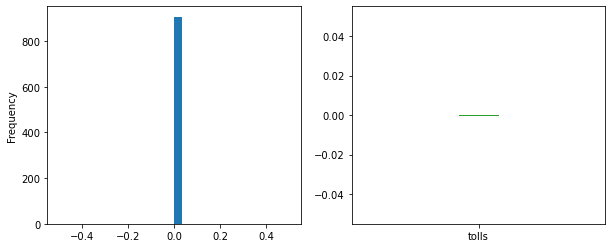

In [42]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
num_tolls["tolls"].plot(kind="hist", bins=30, ax=ax[0])
num_tolls["tolls"].plot(kind="box",           ax=ax[1])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


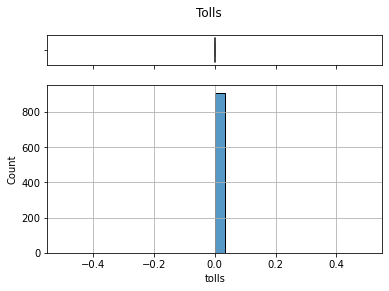

In [43]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_tolls["tolls"], ax=ax_box)
sns.histplot(data=num_tolls, x="tolls", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('Tolls')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'tolls')
#f.savefig(plot_path)

## Log-Transform

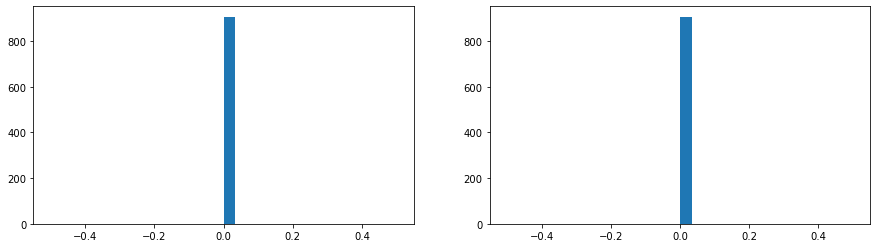

In [44]:
x     = num_tolls["tolls"]
log_x = np.log(x+1)

f, ax = plt.subplots(1,2, figsize=(15, 4))

ax[0].hist(x,     bins=30)
ax[1].hist(log_x, bins=30);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='tolls'>

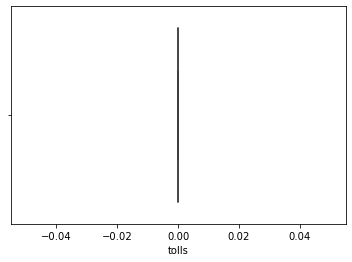

In [45]:
sns.boxplot(x)

## Two dimensions

(0.0, 10.0)

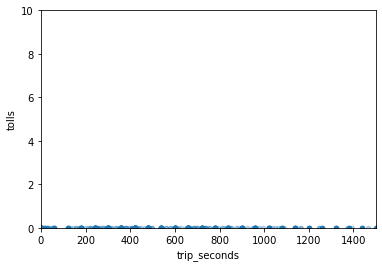

In [46]:
num_tolls.plot(kind="scatter", x="trip_seconds", y="tolls", alpha=0.3)
plt.xlim(0, 1500)
plt.ylim(0, 10)

In [47]:
x="trip_seconds"
y="tolls"
num_tolls[[x, y]].corr()

,trip_seconds,tolls
trip_seconds,1.0,NaN
tolls,NaN,NaN


<AxesSubplot:xlabel='trip_seconds', ylabel='tolls'>

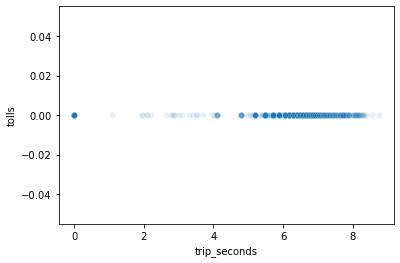

In [48]:
log_x = np.log(num_tolls[x] + 1)
log_y = np.log(num_tolls[y] + 1)
sns.scatterplot(x=log_x, y=log_y, alpha=0.1)

In [49]:
log_num_tolls = pd.DataFrame(
    columns=[x, y]
)

log_num_tolls[x] = log_x
log_num_tolls[y] = log_y

log_num_tolls.corr()

,trip_seconds,tolls
trip_seconds,1.0,NaN
tolls,NaN,NaN


# Extras

## Explore your data

In [50]:
# Get only numeric colums
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]

num_ext = df.select_dtypes(include=numerics)
num_ext.head()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,600,0.8,<NA>,<NA>,<NA>,<NA>,6.75,2.00,0.0,0.0,9.25,NaN,NaN,NaN,NaN
1,960,7.6,<NA>,<NA>,<NA>,<NA>,21.50,0.00,0.0,0.0,21.50,NaN,NaN,NaN,NaN
2,3000,13.2,<NA>,<NA>,<NA>,<NA>,37.00,0.00,0.0,0.0,37.00,NaN,NaN,NaN,NaN
3,2220,12.2,<NA>,<NA>,<NA>,<NA>,35.50,6.08,0.0,4.5,46.58,NaN,NaN,NaN,NaN
4,1560,15.6,<NA>,<NA>,<NA>,<NA>,39.25,8.65,0.0,4.0,52.40,NaN,NaN,NaN,NaN


## One-dimensional data

<AxesSubplot:>

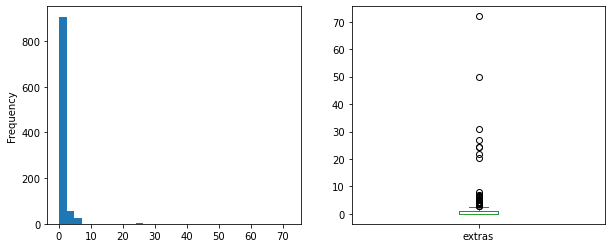

In [51]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
num_ext["extras"].plot(kind="hist", bins=30, ax=ax[0])
num_ext["extras"].plot(kind="box",           ax=ax[1])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


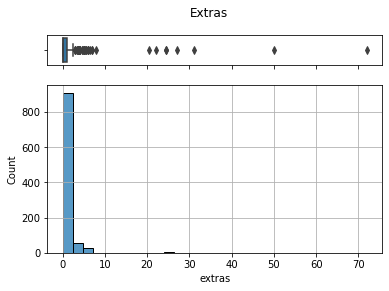

In [52]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_ext["extras"], ax=ax_box)
sns.histplot(data=num_ext, x="extras", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('Extras')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'extras')
#f.savefig(plot_path)

## Log-Transform

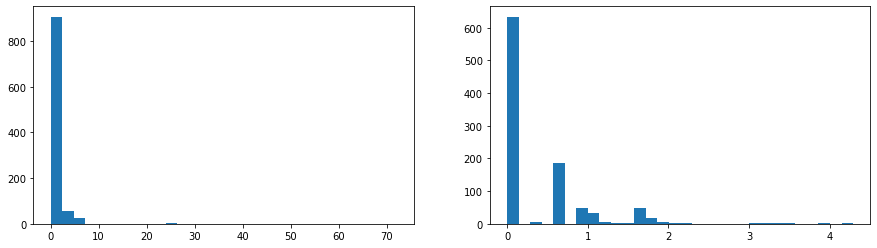

In [53]:
x     = num_ext["extras"]
log_x = np.log(x+1)

f, ax = plt.subplots(1,2, figsize=(15, 4))

ax[0].hist(x,     bins=30)
ax[1].hist(log_x, bins=30);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='extras'>

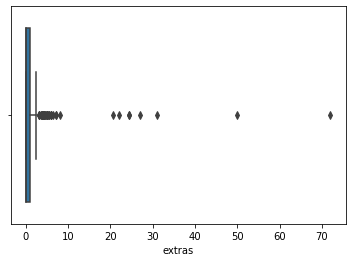

In [54]:
sns.boxplot(x)

## Two dimensions

(0.0, 10.0)

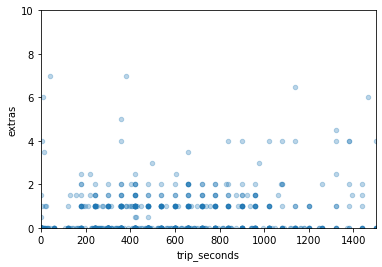

In [55]:
num_ext.plot(kind="scatter", x="trip_seconds", y="extras", alpha=0.3)
plt.xlim(0, 1500)
plt.ylim(0, 10)

In [56]:
x="trip_seconds"
y="extras"
num_ext[[x, y]].corr()

,trip_seconds,extras
trip_seconds,1.000000,0.223759
extras,0.223759,1.000000


<AxesSubplot:xlabel='trip_seconds', ylabel='extras'>

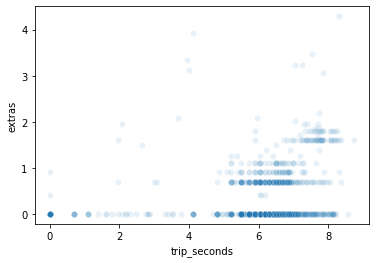

In [57]:
log_x = np.log(num_ext[x] + 1)
log_y = np.log(num_ext[y] + 1)
sns.scatterplot(x=log_x, y=log_y, alpha=0.1)

In [58]:
log_num_ext = pd.DataFrame(
    columns=[x, y]
)

log_num_ext[x] = log_x
log_num_ext[y] = log_y

log_num_ext.corr()

,trip_seconds,extras
trip_seconds,1.000000,0.219694
extras,0.219694,1.000000


# Trip_total

## Explore your data

In [59]:
# Get only numeric colums
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]

num_tp = df.select_dtypes(include=numerics)
num_tp.head()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,600,0.8,<NA>,<NA>,<NA>,<NA>,6.75,2.00,0.0,0.0,9.25,NaN,NaN,NaN,NaN
1,960,7.6,<NA>,<NA>,<NA>,<NA>,21.50,0.00,0.0,0.0,21.50,NaN,NaN,NaN,NaN
2,3000,13.2,<NA>,<NA>,<NA>,<NA>,37.00,0.00,0.0,0.0,37.00,NaN,NaN,NaN,NaN
3,2220,12.2,<NA>,<NA>,<NA>,<NA>,35.50,6.08,0.0,4.5,46.58,NaN,NaN,NaN,NaN
4,1560,15.6,<NA>,<NA>,<NA>,<NA>,39.25,8.65,0.0,4.0,52.40,NaN,NaN,NaN,NaN


## One-dimensional data

<AxesSubplot:>

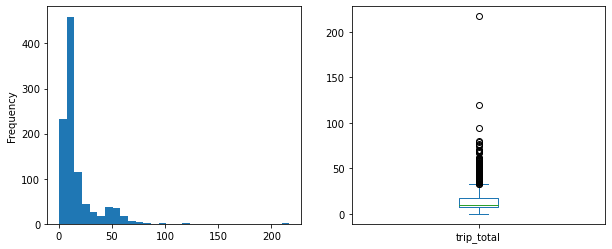

In [60]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
num_tp["trip_total"].plot(kind="hist", bins=30, ax=ax[0])
num_tp["trip_total"].plot(kind="box",           ax=ax[1])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


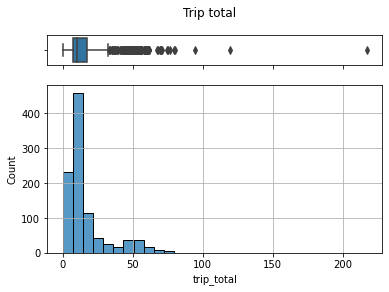

In [61]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_tp["trip_total"], ax=ax_box)
sns.histplot(data=num_tp, x="trip_total", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('Trip total')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'trip_total')
#f.savefig(plot_path)

## Log-Transform

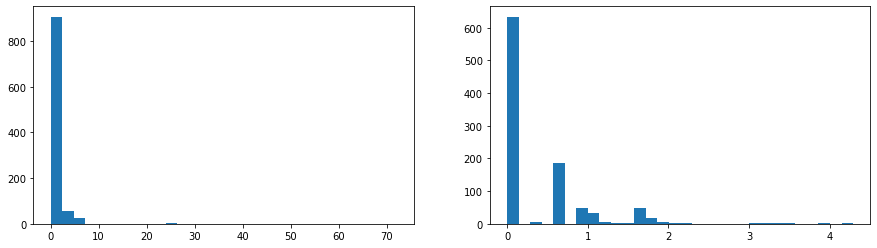

In [62]:
x     = num_tp["extras"]
log_x = np.log(x+1)

f, ax = plt.subplots(1,2, figsize=(15, 4))

ax[0].hist(x,     bins=30)
ax[1].hist(log_x, bins=30);

In [63]:
sns.boxplot(xtp)

NameError: name 'xtp' is not defined

## Two dimensions

(0.0, 10.0)

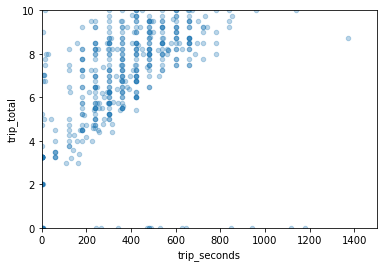

In [64]:
num_tp.plot(kind="scatter", x="trip_seconds", y="trip_total", alpha=0.3)
plt.xlim(0, 1500)
plt.ylim(0, 10)

In [65]:
x="trip_seconds"
y="trip_total"
num_tp[[x, y]].corr()

,trip_seconds,trip_total
trip_seconds,1.000000,0.777201
trip_total,0.777201,1.000000


<AxesSubplot:xlabel='trip_seconds', ylabel='trip_total'>

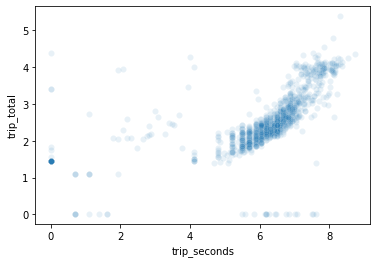

In [66]:
log_x = np.log(num_tp[x] + 1)
log_y = np.log(num_tp[y] + 1)
sns.scatterplot(x=log_x, y=log_y, alpha=0.1)

In [71]:
log_num_tp = pd.DataFrame(
    columns=[x, y]
)

log_num_tp[x] = log_x
log_num_tp[y] = log_y

log_num_tp.corr()

,trip_seconds,trip_total
trip_seconds,1.000000,0.585017
trip_total,0.585017,1.000000


# Muchas dimensiones

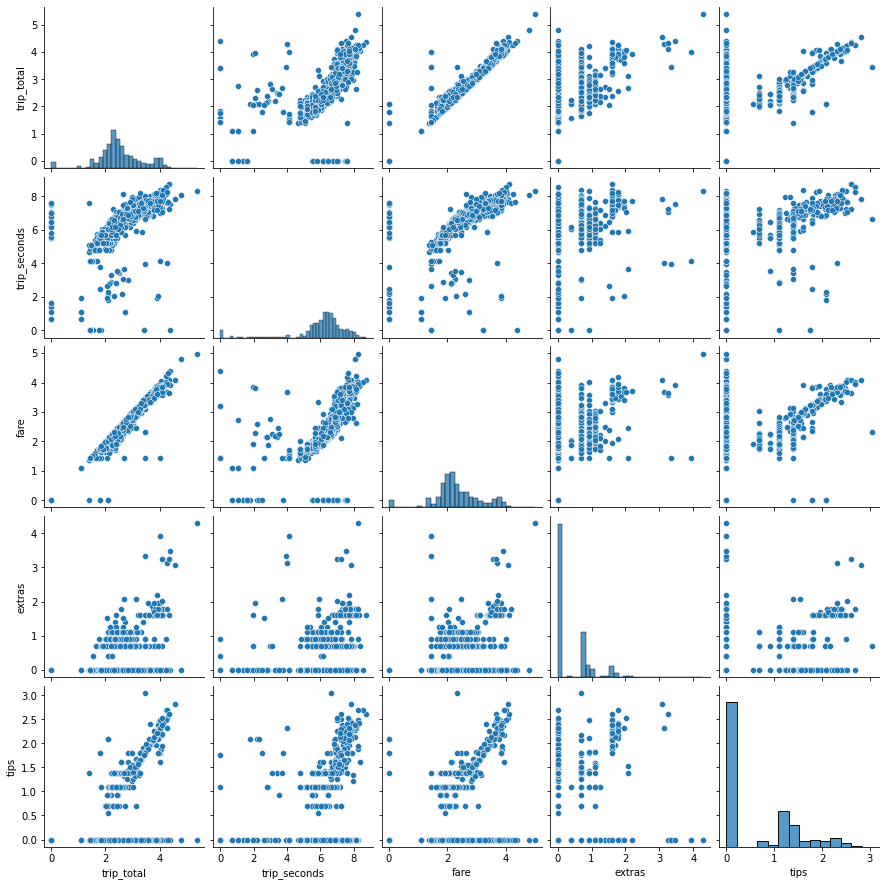

In [70]:
sns.pairplot(data=np.log(num_df[cols]+1));

<AxesSubplot:>

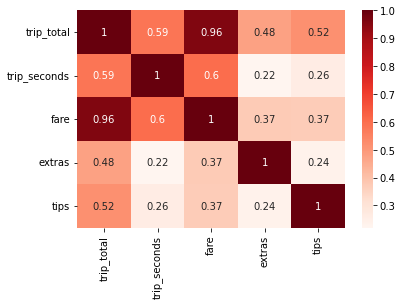

In [72]:
correlat =np.log(num_df[cols]+1).corr()
sns.heatmap(correlat,cmap='Reds',annot=True)

# Manipulating Data

In [73]:
minmax_scaler = MinMaxScaler().fit(num_df[cols])
data_min_max_scaled = minmax_scaler.transform(num_df[cols])

In [74]:
num_df_minmax_scaled = pd.DataFrame(columns = num_df[cols].columns, data = data_min_max_scaled)
num_df_minmax_scaled.head()

,trip_total,trip_seconds,fare,extras,tips
0,0.042583,0.096154,0.046486,0.000000,0.1000
1,0.099037,0.153846,0.148217,0.000000,0.0000
2,0.170469,0.480769,0.255121,0.000000,0.0000
3,0.214618,0.355769,0.244776,0.062500,0.3040
4,0.241440,0.250000,0.270639,0.055556,0.4325


<AxesSubplot:>

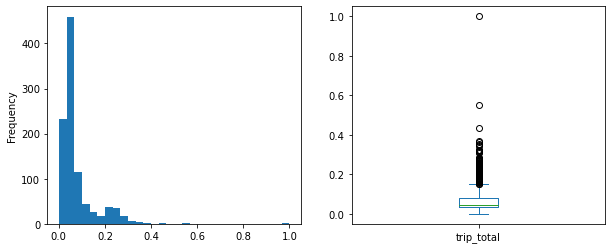

In [78]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
num_df_minmax_scaled["trip_total"].plot(kind="hist", bins=30, ax=ax[0])
num_df_minmax_scaled["trip_total"].plot(kind="box",           ax=ax[1])

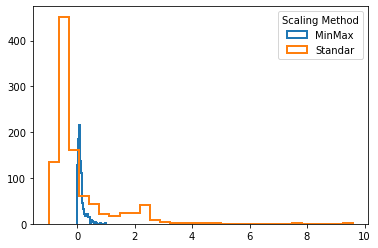

In [79]:
x = num_df["fare"]
x_min = x.min()
x_max = x.max()

x_mean = x.mean()
x_std  = x.std()

x_minmax_scaled = (x -x_min) / (x_max - x_min) # MinMax Scaler
x_std_scaled     = (x-x_mean)/x_std            # Standar scaler

plt.hist(x_scaled,     bins=30, label="MinMax",  histtype = "step", lw=2)
plt.hist(x_std_scaled, bins=30, label="Standar", histtype = "step", lw=2)

plt.legend(title = "Scaling Method");